### 1. Importing import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### 2. Import data and create data frame

In [2]:
df = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv',sep=',')
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


### 3. Explore data frame

#### a). Data frame shape

In [3]:
df.shape

(30, 17)

#### b). Data frame info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


##### Outcome :
* As per problem statement there are total 16 input for model and 1 output for model.
* As per problem statement 'W' is target variable.'W' is interger data type.
* 1 Out of 16 which is 'ERA' is only float data type rest are same as target as integer data type.
* There are no null value in the data frame.

#### c). Cross-checking null values

In [5]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

* R:   Runs
* AB:  At Bats
* H:   Hits
* 2B:  Doubles
* 3B:  Triples
* HR:  Homeruns
* BB:  Walks
* SO:  Strikeouts
* SB:  Stolen Bases
* RA:  Runs Allowed
* ER:  Earned Runs
* ERA: Earned Run Average (ERA)
* CG:  Complete Games
* SHO: Shutouts 
* SV:  Saves
* E:   Errors
* W:   Win

#### d). Data Describe

In [6]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


### 3. Data Visualization (Distribution,Outlier's and Relationship with target variable)

#### a). Distribution Of R,Checking Outlier's & impact on target variable

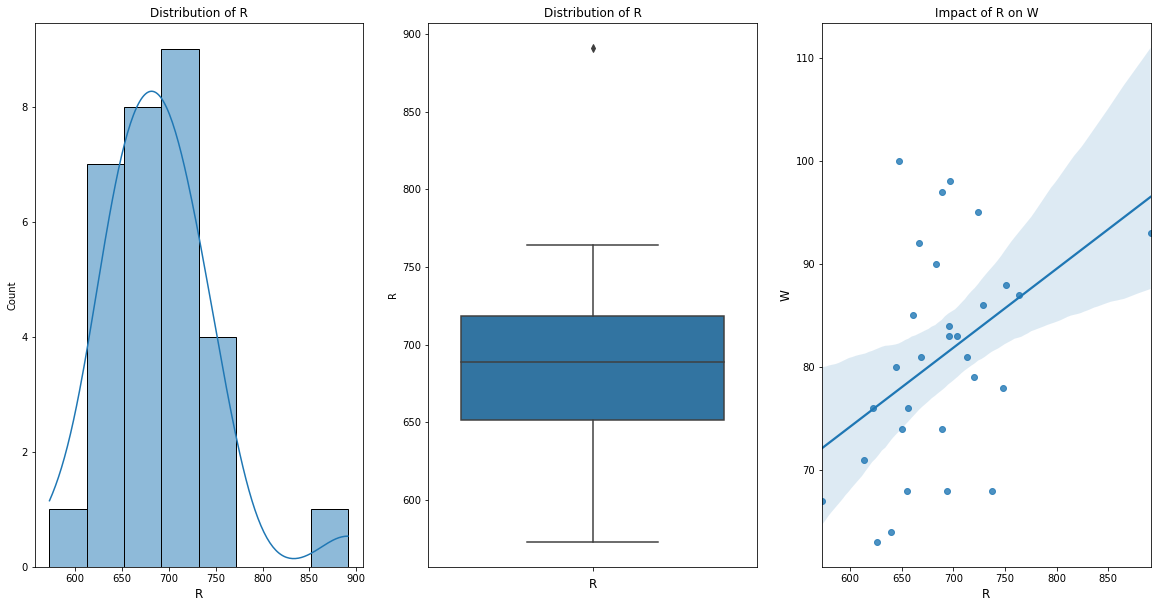

In [7]:
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
sns.histplot(x='R',kde=True,data = df)
plt.title('Distribution of R')
plt.xlabel('R',fontsize=12)
plt.subplot(1,3,2)
sns.boxplot(y='R',data = df)
plt.title('Distribution of R')
plt.xlabel('R',fontsize=12)
plt.subplot(1,3,3)
sns.regplot(x='R',y='W',data=df)
plt.title('Impact of R on W')
plt.xlabel('R',fontsize=12)
plt.ylabel('W',fontsize=12)
plt.show()

##### Outcome :
* Outlier's is present.
* 'R' Linearly correlated with target 'W'.

#### b). Distribution Of AB,Checking Outlier's & impact on target variable

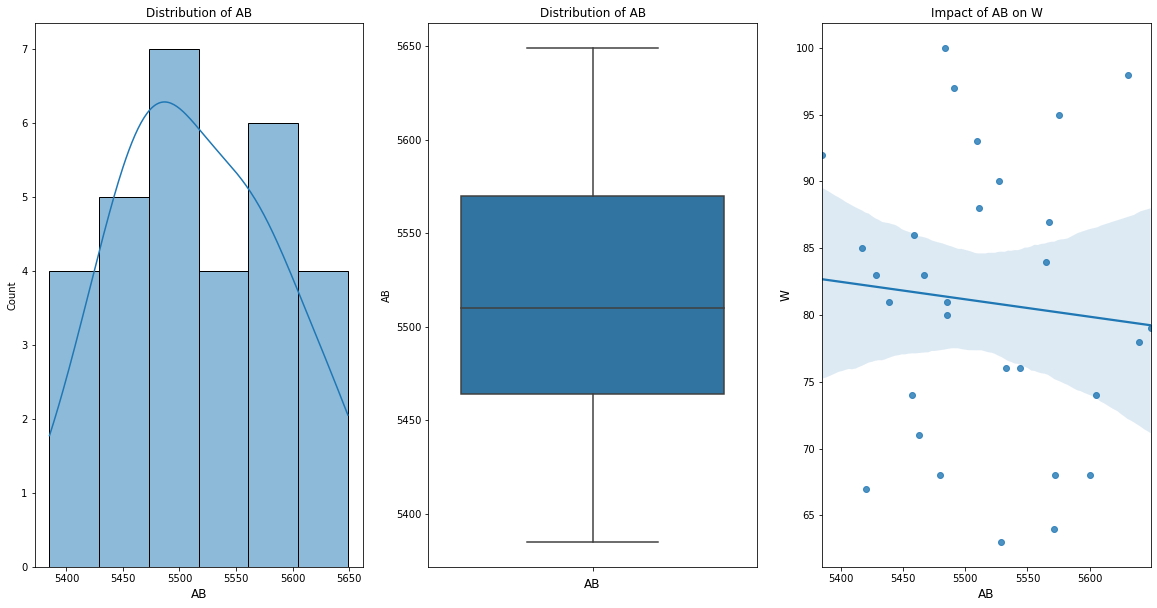

In [8]:
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
sns.histplot(x='AB',kde=True,data = df)
plt.title('Distribution of AB')
plt.xlabel('AB',fontsize=12)
plt.subplot(1,3,2)
sns.boxplot(y='AB',data = df)
plt.title('Distribution of AB')
plt.xlabel('AB',fontsize=12)
plt.subplot(1,3,3)
sns.regplot(x='AB',y='W',data=df)
plt.title('Impact of AB on W')
plt.xlabel('AB',fontsize=12)
plt.ylabel('W',fontsize=12)
plt.show()

##### Outcome :
* Outlier's is not present.
* 'AB' Very weakly negative correlated with target 'W'.

#### c). Distribution Of H,Checking Outlier's & impact on target variable

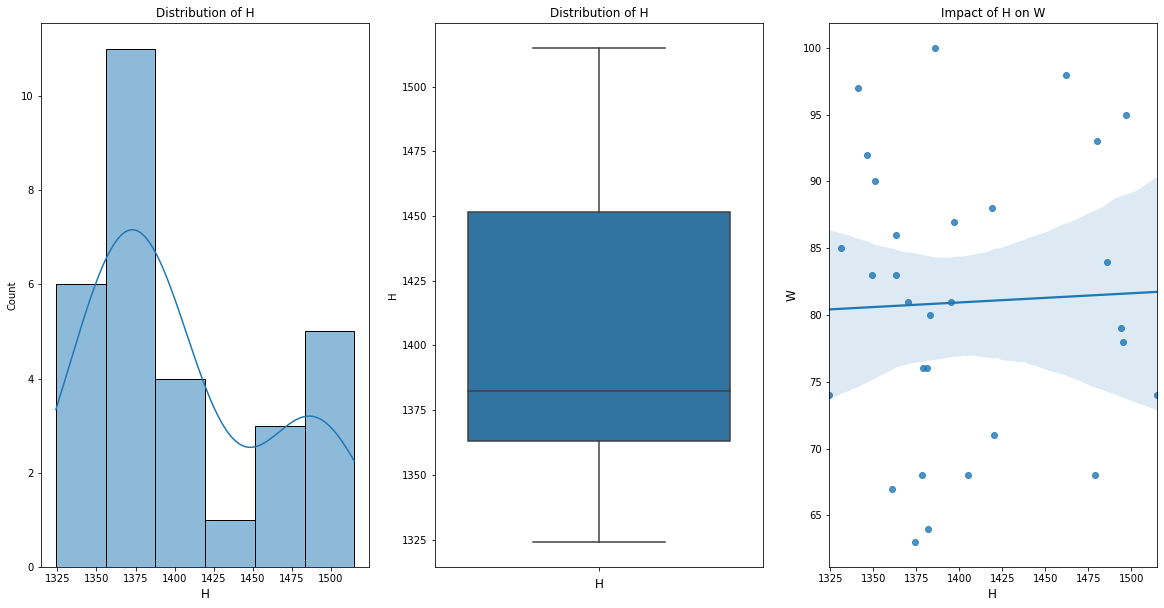

In [9]:
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
sns.histplot(x='H',kde=True,data = df)
plt.title('Distribution of H')
plt.xlabel('H',fontsize=12)
plt.subplot(1,3,2)
sns.boxplot(y='H',data = df)
plt.title('Distribution of H')
plt.xlabel('H',fontsize=12)
plt.subplot(1,3,3)
sns.regplot(x='H',y='W',data=df)
plt.title('Impact of H on W')
plt.xlabel('H',fontsize=12)
plt.ylabel('W',fontsize=12)
plt.show()

##### Outcome :
* Outlier's is not present.
* 'H' Very weakly correlated with target 'W'.

#### d). Distribution Of 2B,Checking Outlier's & impact on target variable

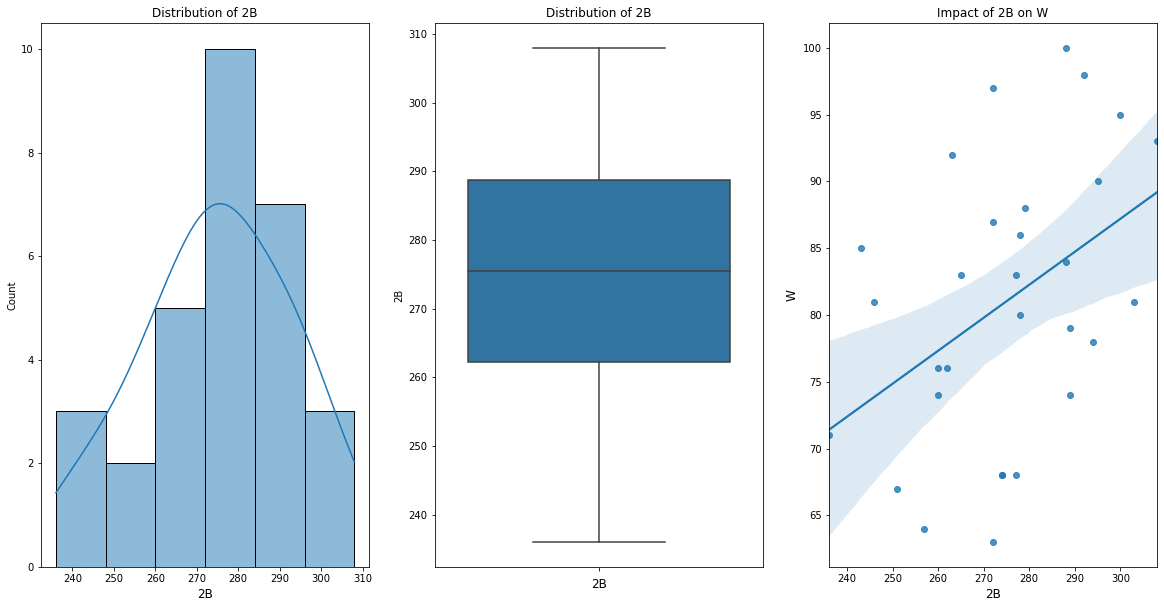

In [10]:
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
sns.histplot(x='2B',kde=True,data = df)
plt.title('Distribution of 2B')
plt.xlabel('2B',fontsize=12)
plt.subplot(1,3,2)
sns.boxplot(y='2B',data = df)
plt.title('Distribution of 2B')
plt.xlabel('2B',fontsize=12)
plt.subplot(1,3,3)
sns.regplot(x='2B',y='W',data=df)
plt.title('Impact of 2B on W')
plt.xlabel('2B',fontsize=12)
plt.ylabel('W',fontsize=12)
plt.show()

##### Outcome :
* There is some skewness which is left skewness.
* Outlier's is not present.
* '2B' Linearly correlated with target 'W'.

#### e). Distribution Of 3B,Checking Outlier's & impact on target variable

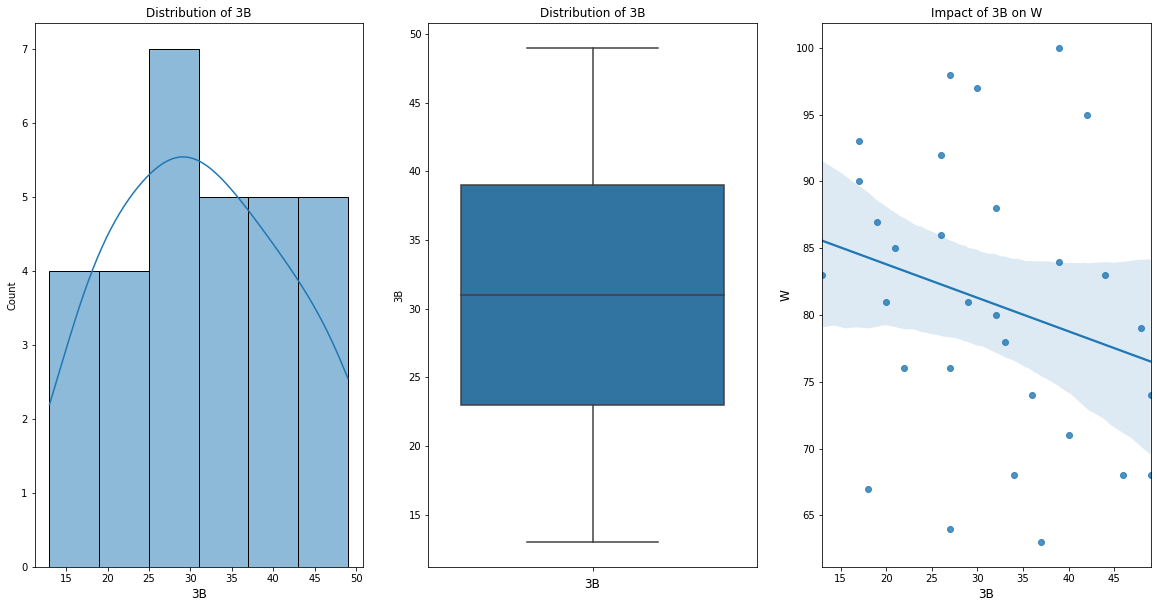

In [11]:
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
sns.histplot(x='3B',kde=True,data = df)
plt.title('Distribution of 3B')
plt.xlabel('3B',fontsize=12)
plt.subplot(1,3,2)
sns.boxplot(y='3B',data = df)
plt.title('Distribution of 3B')
plt.xlabel('3B',fontsize=12)
plt.subplot(1,3,3)
sns.regplot(x='3B',y='W',data=df)
plt.title('Impact of 3B on W')
plt.xlabel('3B',fontsize=12)
plt.ylabel('W',fontsize=12)
plt.show()

##### Outcome :
* Outlier's is not present.
* '3B' Very negative correlated with target 'W'.

#### f). Distribution Of HR,Checking Outlier's & impact on target variable

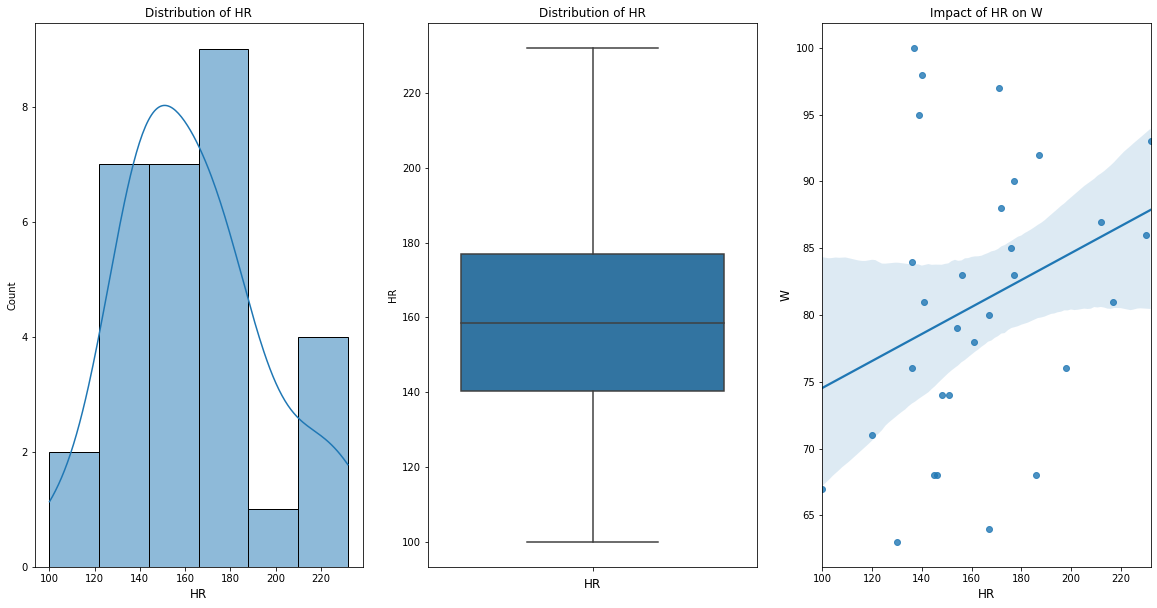

In [12]:
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
sns.histplot(x='HR',kde=True,data = df)
plt.title('Distribution of HR')
plt.xlabel('HR',fontsize=12)
plt.subplot(1,3,2)
sns.boxplot(y='HR',data = df)
plt.title('Distribution of HR')
plt.xlabel('HR',fontsize=12)
plt.subplot(1,3,3)
sns.regplot(x='HR',y='W',data=df)
plt.title('Impact of HR on W')
plt.xlabel('HR',fontsize=12)
plt.ylabel('W',fontsize=12)
plt.show()

##### Outcome :
* There is some skewness which is right skewness.
* Outlier's is not present.
* 'HR' Very low correlated with target 'W'.

#### g). Distribution Of BB,Checking Outlier's & impact on target variable

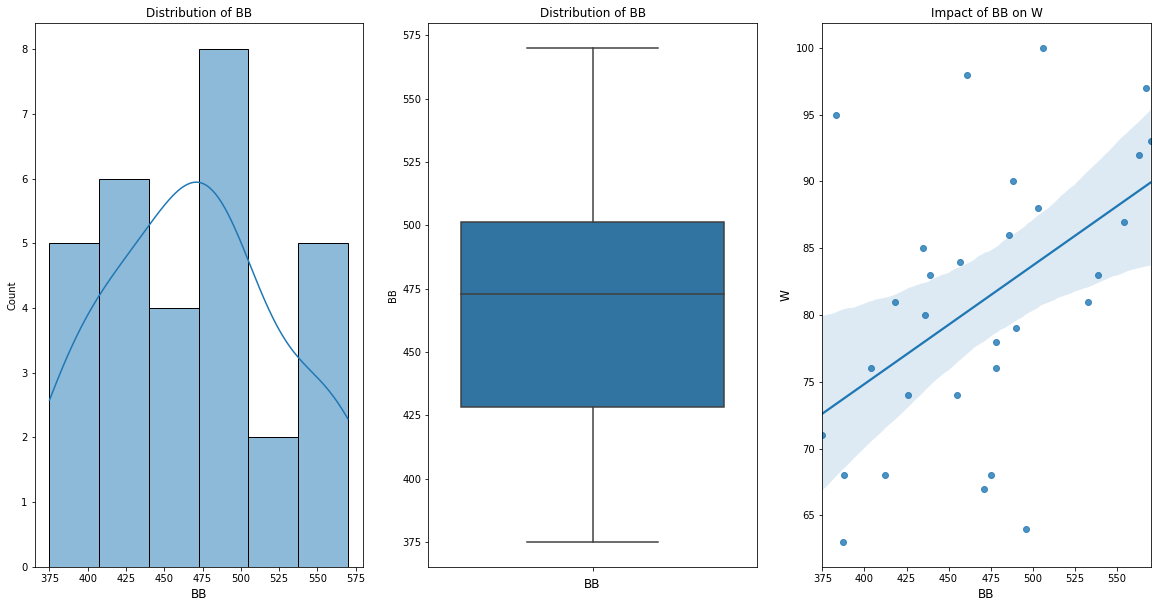

In [13]:
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
sns.histplot(x='BB',kde=True,data = df)
plt.title('Distribution of BB')
plt.xlabel('BB',fontsize=12)
plt.subplot(1,3,2)
sns.boxplot(y='BB',data = df)
plt.title('Distribution of BB')
plt.xlabel('BB',fontsize=12)
plt.subplot(1,3,3)
sns.regplot(x='BB',y='W',data=df)
plt.title('Impact of BB on W')
plt.xlabel('BB',fontsize=12)
plt.ylabel('W',fontsize=12)
plt.show()

##### Outcome :
* Outlier's is not present.
* 'BB' Linearly correlated with target 'W'.

#### h). Distribution Of SO,Checking Outlier's & impact on target variable

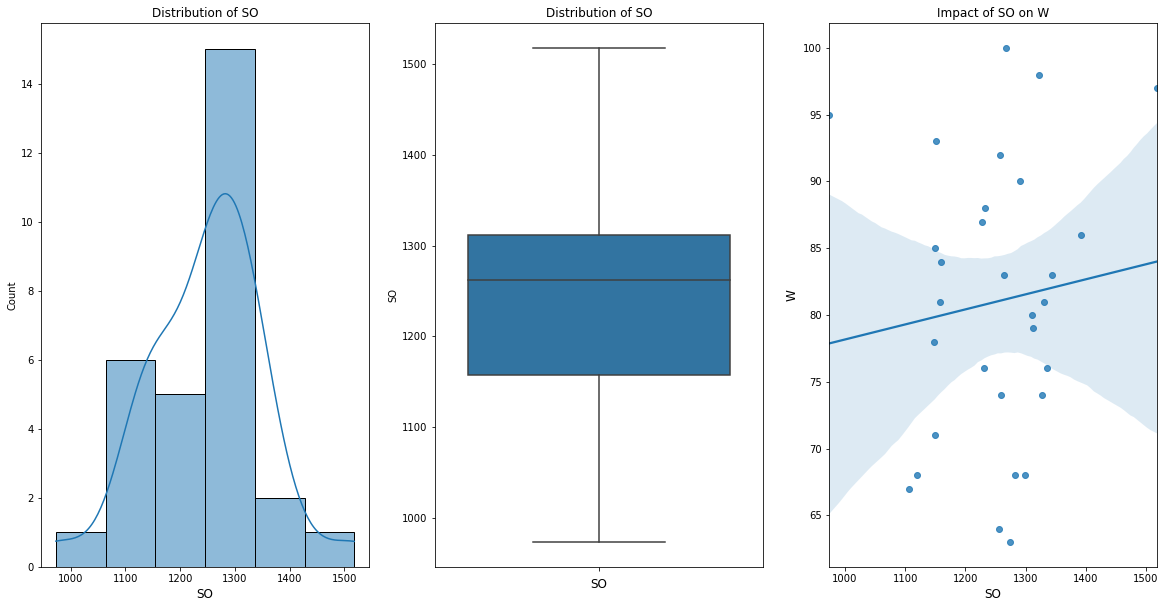

In [14]:
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
sns.histplot(x='SO',kde=True,data = df)
plt.title('Distribution of SO')
plt.xlabel('SO',fontsize=12)
plt.subplot(1,3,2)
sns.boxplot(y='SO',data = df)
plt.title('Distribution of SO')
plt.xlabel('SO',fontsize=12)
plt.subplot(1,3,3)
sns.regplot(x='SO',y='W',data=df)
plt.title('Impact of SO on W')
plt.xlabel('SO',fontsize=12)
plt.ylabel('W',fontsize=12)
plt.show()

##### Outcome :
* There is some skewness which is left skewness.
* Outlier's is not present.
* 'SO' is not correlated with target 'W'.

#### i). Distribution Of SB,Checking Outlier's & impact on target variable

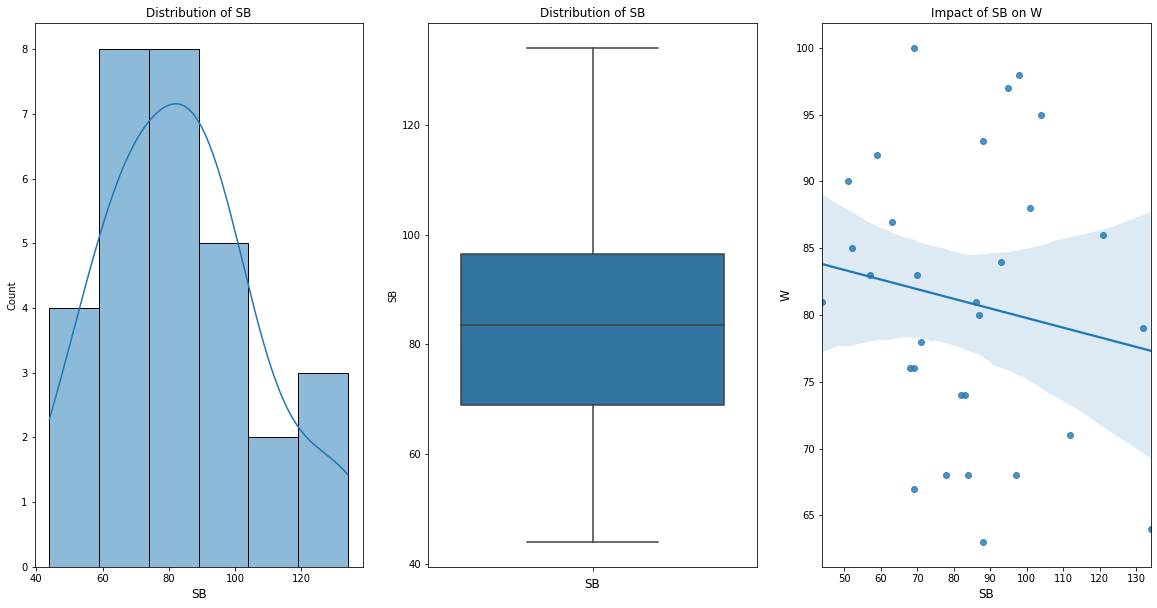

In [15]:
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
sns.histplot(x='SB',kde=True,data = df)
plt.title('Distribution of SB')
plt.xlabel('SB',fontsize=12)
plt.subplot(1,3,2)
sns.boxplot(y='SB',data = df)
plt.title('Distribution of SB')
plt.xlabel('SB',fontsize=12)
plt.subplot(1,3,3)
sns.regplot(x='SB',y='W',data=df)
plt.title('Impact of SB on W')
plt.xlabel('SB',fontsize=12)
plt.ylabel('W',fontsize=12)
plt.show()

Outcome :
* Outlier's is not present.
* 'SB' is negatively correlated with target 'W'.

#### j). Distribution Of RA,Checking Outlier's & impact on target variable

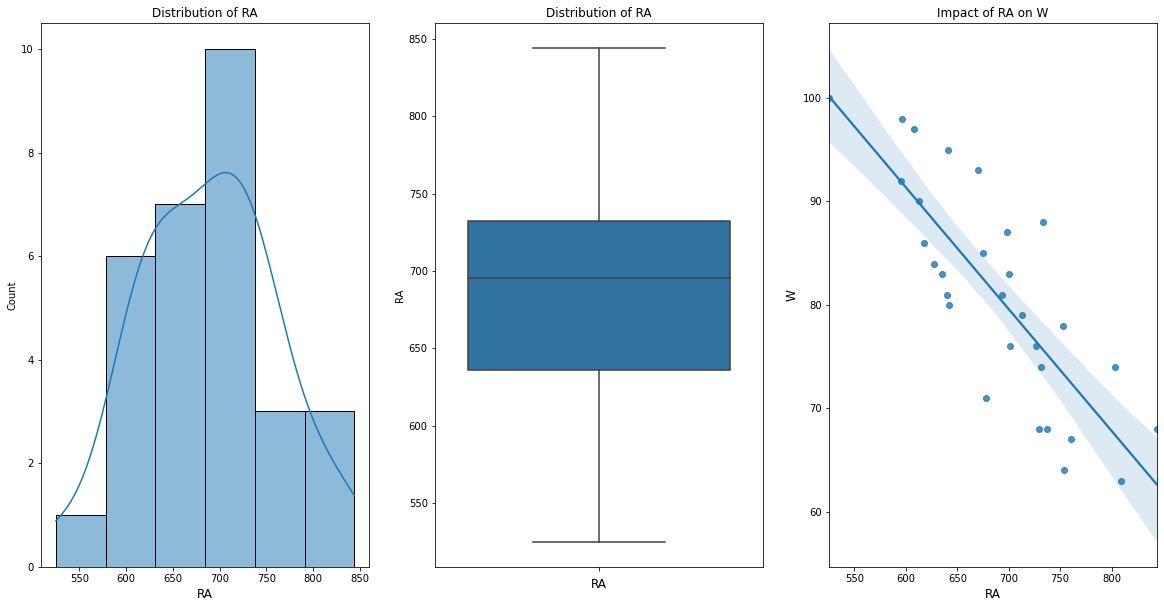

In [16]:
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
sns.histplot(x='RA',kde=True,data = df)
plt.title('Distribution of RA')
plt.xlabel('RA',fontsize=12)
plt.subplot(1,3,2)
sns.boxplot(y='RA',data = df)
plt.title('Distribution of RA')
plt.xlabel('RA',fontsize=12)
plt.subplot(1,3,3)
sns.regplot(x='RA',y='W',data=df)
plt.title('Impact of RA on W')
plt.xlabel('RA',fontsize=12)
plt.ylabel('W',fontsize=12)
plt.show()

Outcome :
* Outlier's is not present.
* 'RA' is negative correlated with target 'W'.

#### k). Distribution Of ER,Checking Outlier's & impact on target variable

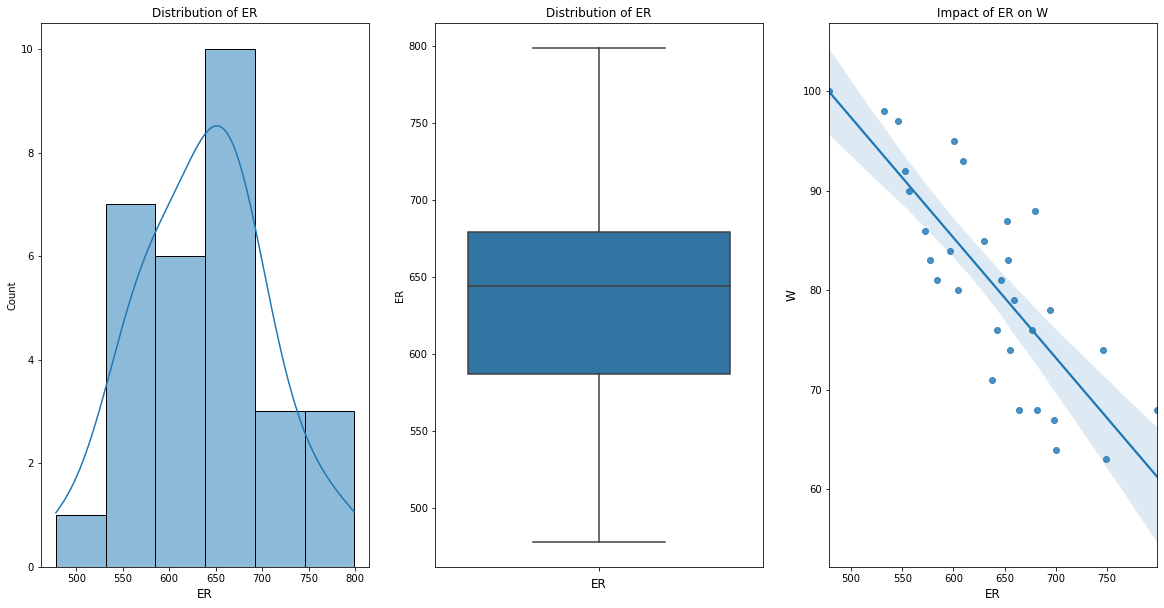

In [17]:
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
sns.histplot(x='ER',kde=True,data = df)
plt.title('Distribution of ER')
plt.xlabel('ER',fontsize=12)
plt.subplot(1,3,2)
sns.boxplot(y='ER',data = df)
plt.title('Distribution of ER')
plt.xlabel('ER',fontsize=12)
plt.subplot(1,3,3)
sns.regplot(x='ER',y='W',data=df)
plt.title('Impact of ER on W')
plt.xlabel('ER',fontsize=12)
plt.ylabel('W',fontsize=12)
plt.show()

##### Outcome :
* Outlier's is not present.
* 'ER' is negative correlated with target 'W'.

#### l). Distribution Of ERA,Checking Outlier's & impact on target variable

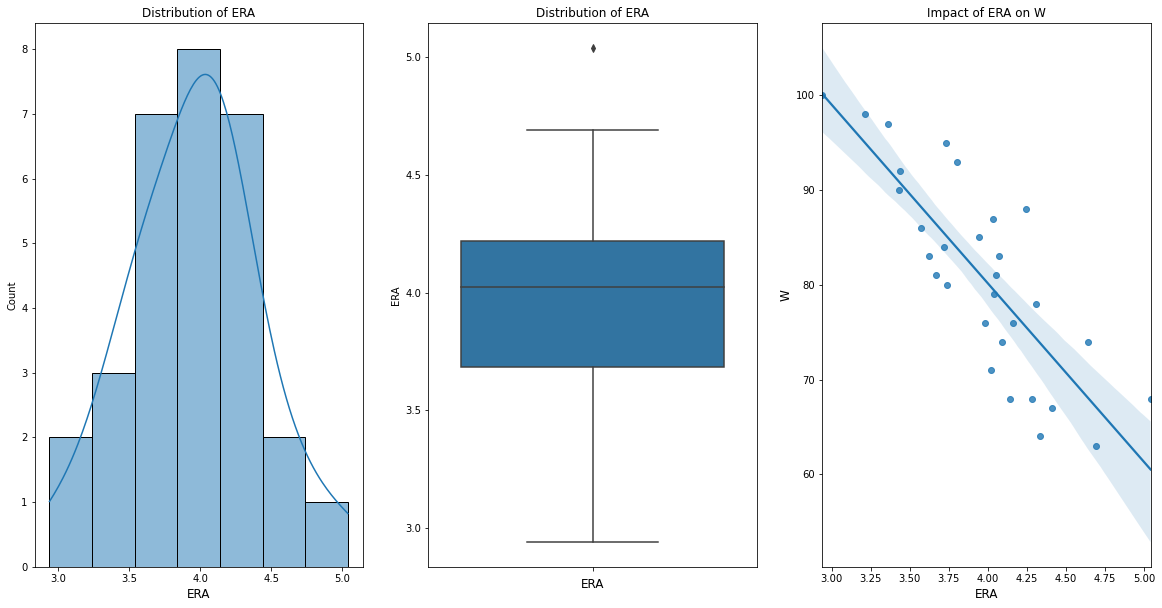

In [18]:
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
sns.histplot(x='ERA',kde=True,data = df)
plt.title('Distribution of ERA')
plt.xlabel('ERA',fontsize=12)
plt.subplot(1,3,2)
sns.boxplot(y='ERA',data = df)
plt.title('Distribution of ERA')
plt.xlabel('ERA',fontsize=12)
plt.subplot(1,3,3)
sns.regplot(x='ERA',y='W',data=df)
plt.title('Impact of ERA on W')
plt.xlabel('ERA',fontsize=12)
plt.ylabel('W',fontsize=12)
plt.show()

##### Outcome :
* Outlier's is present.
* 'ERA' is not correlated with target 'W'.

#### m). Distribution Of CG,Checking Outlier's & impact on target variable

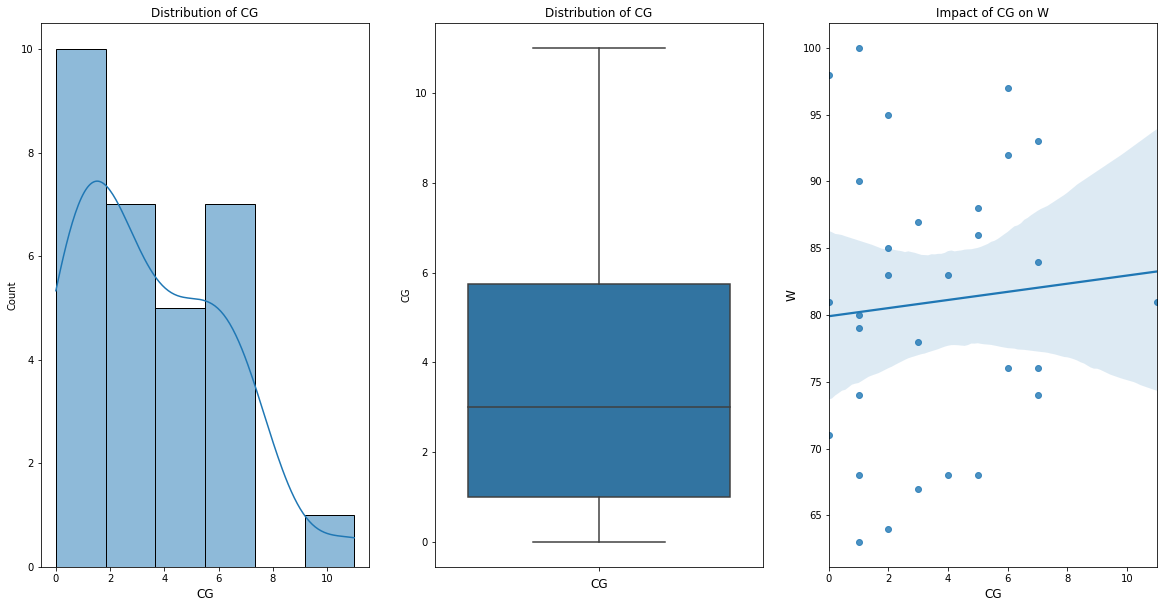

In [19]:
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
sns.histplot(x='CG',kde=True,data = df)
plt.title('Distribution of CG')
plt.xlabel('CG',fontsize=12)
plt.subplot(1,3,2)
sns.boxplot(y='CG',data = df)
plt.title('Distribution of CG')
plt.xlabel('CG',fontsize=12)
plt.subplot(1,3,3)
sns.regplot(x='CG',y='W',data=df)
plt.title('Impact of CG on W')
plt.xlabel('CG',fontsize=12)
plt.ylabel('W',fontsize=12)
plt.show()

##### Outcome :
* There is some skewness which is right skewness.
* Outlier's is not present.
* 'CG' Very weakly correlated with target 'W'.

#### n). Distribution Of SHO,Checking Outlier's & impact on target variable

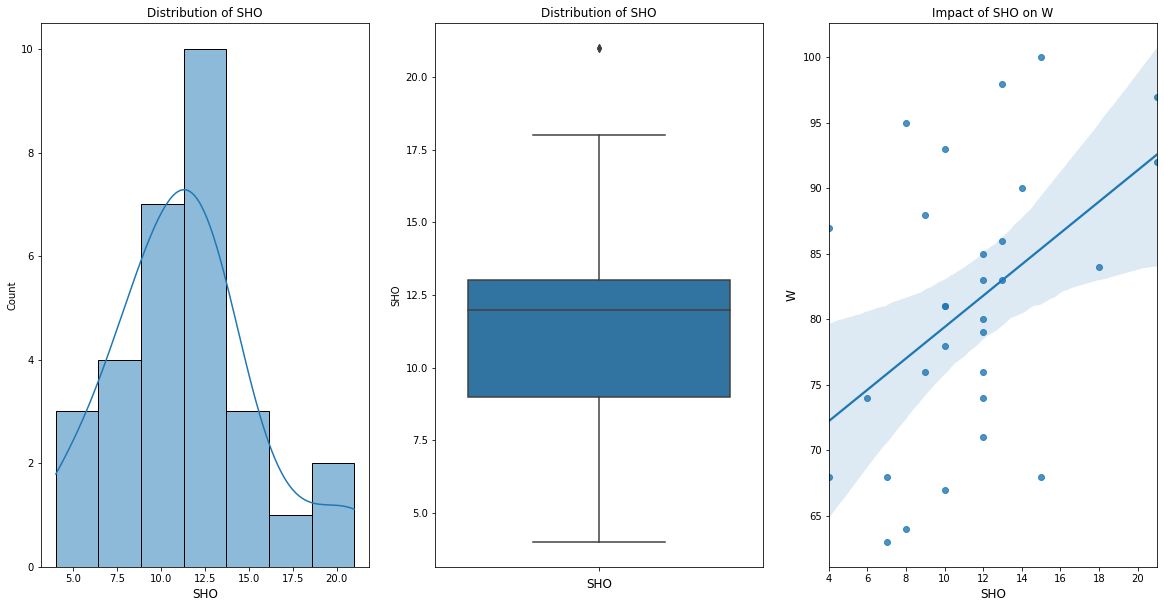

In [20]:
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
sns.histplot(x='SHO',kde=True,data = df)
plt.title('Distribution of SHO')
plt.xlabel('SHO',fontsize=12)
plt.subplot(1,3,2)
sns.boxplot(y='SHO',data = df)
plt.title('Distribution of SHO')
plt.xlabel('SHO',fontsize=12)
plt.subplot(1,3,3)
sns.regplot(x='SHO',y='W',data=df)
plt.title('Impact of SHO on W')
plt.xlabel('SHO',fontsize=12)
plt.ylabel('W',fontsize=12)
plt.show()

##### Outcome :
* There is some skewness which is right skewness.
* Outlier's is not present.
* 'SHO' linearly correlated with target 'W'.

#### o). Distribution Of SV,Checking Outlier's & impact on target variable

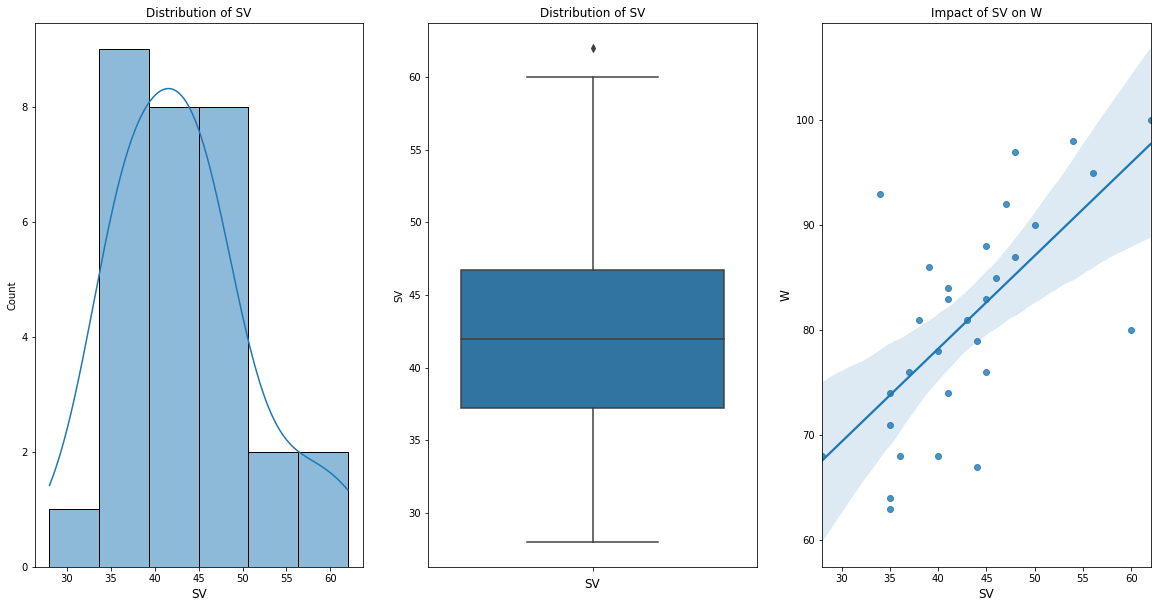

In [21]:
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
sns.histplot(x='SV',kde=True,data = df)
plt.title('Distribution of SV')
plt.xlabel('SV',fontsize=12)
plt.subplot(1,3,2)
sns.boxplot(y='SV',data = df)
plt.title('Distribution of SV')
plt.xlabel('SV',fontsize=12)
plt.subplot(1,3,3)
sns.regplot(x='SV',y='W',data=df)
plt.title('Impact of SV on W')
plt.xlabel('SV',fontsize=12)
plt.ylabel('W',fontsize=12)
plt.show()

##### Outcome :
* Outlier's is not present.
* 'SV' linearly correlated with target 'W'.

#### p). Distribution Of E,Checking Outlier's & impact on target variable

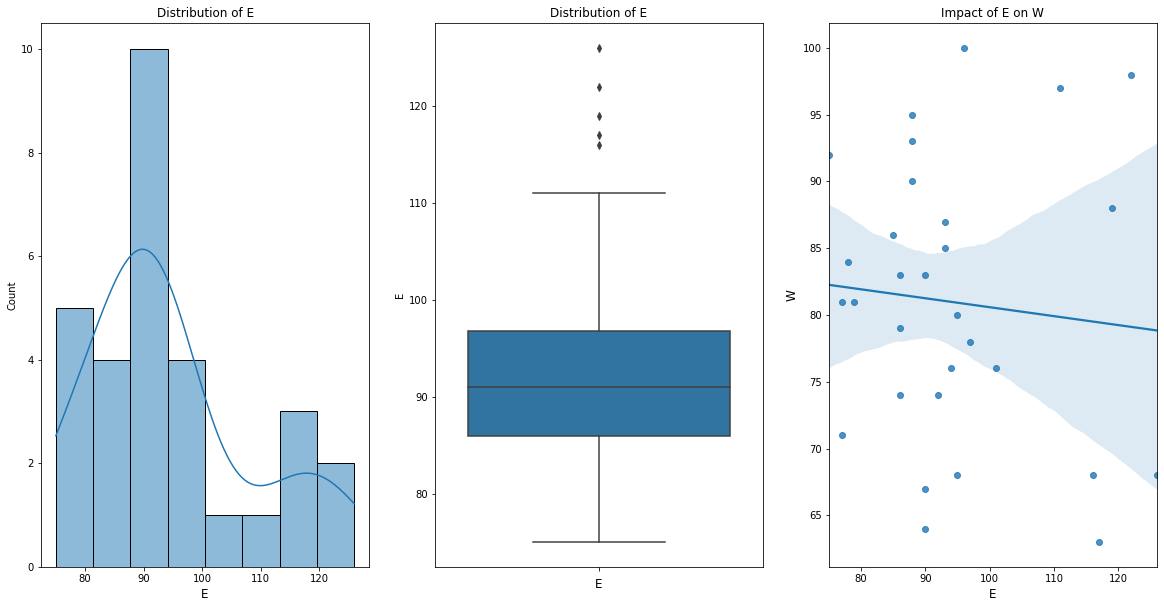

In [22]:
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
sns.histplot(x='E',kde=True,data = df)
plt.title('Distribution of E')
plt.xlabel('E',fontsize=12)
plt.subplot(1,3,2)
sns.boxplot(y='E',data = df)
plt.title('Distribution of E')
plt.xlabel('E',fontsize=12)
plt.subplot(1,3,3)
sns.regplot(x='E',y='W',data=df)
plt.title('Impact of E on W')
plt.xlabel('E',fontsize=12)
plt.ylabel('W',fontsize=12)
plt.show()

##### Outcome :
* There is some skewness which is right skewness.
* Outlier's is present.
* 'E' not correlated with target 'W'.

##### Conclusion :
* Highly postively correlated : 'R','HR','2B','SV','SHO' & 'BB'.
* Highly negatively correalted : 'SB','RA','ER' & 'ERA'.
* Remaining have less or low.   

### 5). Correlation matrix to see the coffecient of multicolinearity

#### a). Correlation matrix is in form of data frame

In [23]:
df_corr = df.corr().abs()
df_corr

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,0.087947,0.037612,0.427797,0.251118,0.307407,0.484342,0.111850,0.157234,0.812952,0.809435,0.819600,0.080533,0.471805,0.666530,0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,0.070072,0.671283,0.402452,0.054726,0.081367,0.041623,0.041245,0.049281,0.232042,0.103274,0.096380,0.023262
AB,0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,0.066983,0.136414,0.106022,0.372618,0.316010,0.309686,0.255551,0.080876,0.197321,0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,0.090855,0.118281,0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,0.145559,0.130371,0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,0.150752,0.195027,0.218160,0.235531,0.254854,0.306675,0.057998,0.171576,0.105754
3B,0.251118,0.070072,0.435422,0.478694,0.220490,1.000000,0.430915,0.454949,0.141196,0.457437,0.314125,0.340225,0.330951,0.065898,0.041396,0.142370,0.126678
HR,0.307407,0.671283,0.066983,0.090855,0.056292,0.430915,1.000000,0.425691,0.359923,0.136567,0.103903,0.085922,0.090917,0.156502,0.019119,0.028540,0.207597
BB,0.484342,0.402452,0.136414,0.118281,0.302700,0.454949,0.425691,1.000000,0.233652,0.098347,0.416445,0.452663,0.459832,0.462478,0.426004,0.099445,0.075685
SO,0.111850,0.054726,0.106022,0.398830,0.150752,0.141196,0.359923,0.233652,1.000000,0.030968,0.129745,0.161612,0.180368,0.093418,0.237721,0.126297,0.155133
SB,0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,0.136567,0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,0.020783,0.106563,0.183418,0.079149


#### b). Visualize Correlation matrix using heatmap 

Text(0.5, 1.0, 'Correlation Matrix For Baseball Case Study Data Set')

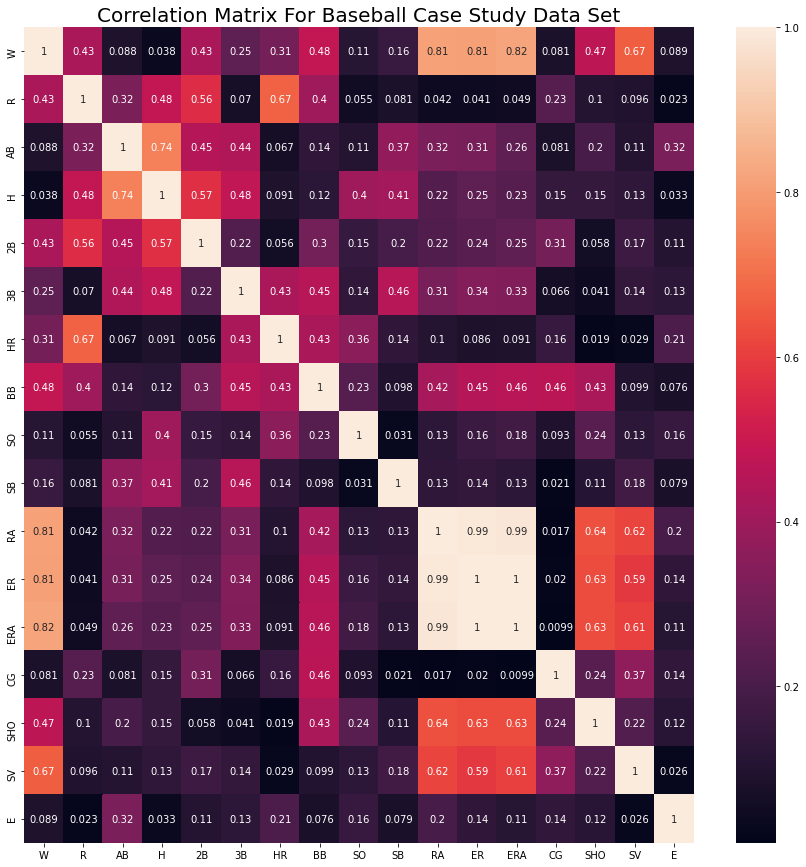

In [24]:
plt.figure(figsize=(15,15))
sns.heatmap(df_corr,annot=True)
plt.title('Correlation Matrix For Baseball Case Study Data Set',fontsize=20)

##### Outcome :
* 'ERA' has 82 percentage correlation with target variable 'W',which can be considered as very strong bond.
* 'ER' has 81 percentage correlation with target variable 'W',which can be considered as very strong bond.
* 'RA' has 81 percentage correlation with target variable 'W',which can be considered as very strong bond.
* 'SV' has 67 percentage correlation with target variable 'W',which can be considered as strong bond.
* 'BB' has 48 percentage correlation with target variable 'W',which can be considered as good bond.
* 'SHO' has 47 percentage correlation with target variable 'W',which can be considered as good bond.
* '2B' has 43 percentage correlation with target variable 'W',which can be considered as good bond.
* 'R' has 43 percentage correlation with target variable 'W',which can be considered as good bond.
* 'HR' has 31 percentage correlation with target variable 'W',which can be considered as good bond.
* '3B' has 25 percentage correlation with target variable 'W',which can be considered as good bond.
* 'SB' has 16 percentage correlation with target variable 'W',which can be considered as weak bond.
* 'SO' has 11 percentage correlation with target variable 'W',which can be considered as weak bond.
* 'E' has 8.9 percentage correlation with target variable 'W',which can be considered as weak bond.
* 'AB' has 8.8 percentage correlation with target variable 'W',which can be considered as weak bond.
* 'CG' has 8.1 percentage correlation with target variable 'W',which can be considered as weak bond.
* 'H' has 3.8 percentage correlation with target variable 'W',which can be considered as weak bond.

### 6). Dealing with outlier's

In [25]:
# finding the outliers

# 1st quantile
q1 = df.quantile(0.25) 

# 3rd quantile
q3 = df.quantile(0.75)

#IQR
iqr = q3-q1

In [26]:
# Deal with 'E' outliers

# finding the High outliers
pre_high = q3.E + (1.5 * iqr.E)
print('The Higher Outliers For E is :',pre_high)

# finding the index of these above the value
pre_high_index = np.where(df['E']>pre_high)
print('The index are :',pre_high_index)

# Drop these index from data frame
df = df.drop(df.index[pre_high_index])
print('Now the shape is :',df.shape)

# Reset the index
df.reset_index()


The Higher Outliers For E is : 112.875
The index are : (array([10, 14, 16, 18, 24], dtype=int64),)
Now the shape is : (25, 17)


,index,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


<AxesSubplot:ylabel='E'>

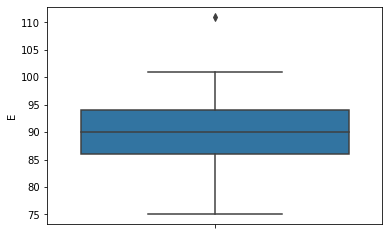

In [27]:
sns.boxplot(y=df['E'])

### 7). Selecting dependent variable as 'y' and independent variable as 'X'

In [28]:
y = df['W']
X = df.drop(columns='W')

In [29]:
X

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [30]:
y

0      95
1      83
2      81
3      76
4      74
5      93
6      87
7      81
8      80
9      78
11     86
12     85
13     76
15    100
17     97
19     64
20     90
21     83
22     71
23     67
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

### 8). Selecting best features

In [31]:
from sklearn.feature_selection import SelectKBest,f_classif

In [32]:
bestfeatures = SelectKBest(score_func=f_classif,k=10)
fit = bestfeatures.fit(X,y)

# Creating separate dataframe for score & column 
df_score = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

# Conacatenate the dataframe
features_score = pd.concat([df_columns,df_score],axis=1)

# Rename the column name
features_score.columns = (['Features','Score'])

# Print 17 best features
a = print(features_score.nlargest(16,'Score'))

   Features     Score
0         R  7.615955
15        E  6.017143
14       SV  3.669504
13      SHO  3.558609
9        RA  3.555853
8        SB  2.795051
11      ERA  2.522924
10       ER  2.183482
7        SO  1.990899
1        AB  1.688742
6        BB  0.919572
5        HR  0.859025
2         H  0.759492
4        3B  0.731469
3        2B  0.663600
12       CG  0.272691


In [33]:
X_ap = X[['R','E','SV','SHO','RA','SB','ERA','ER','SO','AB']]
X_ap

,R,E,SV,SHO,RA,SB,ERA,ER,SO,AB
0,724,88,56,8,641,104,3.73,601,973,5575
1,696,86,45,12,700,70,4.07,653,1264,5467
2,669,79,38,10,640,86,3.67,584,1157,5439
3,622,101,37,9,701,68,3.98,643,1231,5533
4,689,86,35,12,803,83,4.64,746,1259,5605
5,891,88,34,10,670,88,3.80,609,1151,5509
6,764,93,48,4,698,63,4.03,652,1227,5567
7,713,77,43,10,693,44,4.05,646,1331,5485
8,644,95,60,12,642,87,3.74,604,1310,5485
9,748,97,40,10,753,71,4.31,694,1148,5640


### 9). Normalize the data using Standard scaler

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
ss = StandardScaler()

In [36]:
X_scaled = ss.fit_transform(X_ap)

In [37]:
X_scaled

array([[ 5.80479554e-01, -1.48522131e-01,  1.67874412e+00,
        -8.46545276e-01, -5.86300485e-01,  9.03891461e-01,
        -4.53036875e-01, -4.40976658e-01, -2.56805153e+00,
         9.41114197e-01],
       [ 1.16626029e-01, -3.96059017e-01,  1.89535626e-01,
         1.15437992e-01,  2.63201691e-01, -5.08438947e-01,
         3.36064239e-01,  3.30584117e-01,  1.49809232e-01,
        -6.10172941e-01],
       [-3.30661298e-01, -1.26243812e+00, -7.58142506e-01,
        -3.65553642e-01, -6.00698827e-01,  1.56187127e-01,
        -5.92290013e-01, -6.93217681e-01, -8.49541632e-01,
        -1.01235850e+00],
       [-1.10927257e+00,  1.46046763e+00, -8.93525096e-01,
        -6.06049459e-01,  2.77600033e-01, -5.91517206e-01,
         1.27184533e-01,  1.82207045e-01, -1.58401782e-01,
         3.37835866e-01],
       [ 6.62647892e-04, -3.96059017e-01, -1.16429028e+00,
         1.15437992e-01,  1.74623091e+00,  3.15697385e-02,
         1.65896905e+00,  1.71049089e+00,  1.03110594e-01,
         1.

### 10). Split data using train test split

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=341)

In [40]:
print('The shape of X-train',X_train.shape)
print('The shape of y-train',y_train.shape)
print('The shape of X-test',X_test.shape)
print('The shape of y-test',y_test.shape)

The shape of X-train (20, 10)
The shape of y-train (20,)
The shape of X-test (5, 10)
The shape of y-test (5,)


### 11). Initiate our model

In [41]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score

#### a). Linear Regression Model

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_score = lr.score(X_train,y_train)*100
lr_score_pred = lr.score(X_test,y_test)*100
y_pred_lr = lr.predict(X_test)
mse=mean_squared_error(y_test,y_pred_lr)
lr_score_=np.sqrt(mse)
r2_score_lg = r2_score(y_test,y_pred_lr)
print('The score by Linear Regression on train set is :',lr_score)
print('The score by Linear Regression on test set is :',lr_score_pred)
print('The MSE score is :',mse)
print('The RMSE score is :',lr_score_)
print('The R2 Score is :',r2_score_lg)

The score by Linear Regression on train set is : 91.37975269523756
The score by Linear Regression on test set is : 96.18863245506355
The MSE score is : 2.9118848043314447
The RMSE score is : 1.7064245674308152
The R2 Score is : 0.9618863245506355


#### Cross Validation on Linear Regression Model

In [44]:
score=cross_val_score(lr,X_train,y_train,cv=10,scoring='neg_mean_squared_error')
lr_score_cross=np.sqrt(-score)
print('The cross validation score :',np.mean(lr_score_cross),np.std(lr_score_cross))

The cross validation score : 7.523134232373648 3.4128057822326636


#### b). KNN Model

In [45]:
from sklearn.neighbors import KNeighborsRegressor

In [46]:
kn = KNeighborsRegressor()
kn.fit(X_train,y_train)
kn_score = kn.score(X_train,y_train)*100
kn_score_pred = kn.score(X_test,y_test)*100
y_pred_kn = kn.predict(X_test)
mse_kn=mean_squared_error(y_test,y_pred_kn)
kn_score_=np.sqrt(mse_kn)
r2_score_kn = r2_score(y_test,y_pred_kn)
print('The score by  K-Neighbors Regressor on train set is :',kn_score)
print('The score by K-Neighbors Regressor on test set is :',kn_score_pred)
print('The MSE score is :',mse_kn)
print('The RMSE score is :',kn_score_)
print('The R2 Score is :',r2_score_kn)

The score by  K-Neighbors Regressor on train set is : 59.75183712805689
The score by K-Neighbors Regressor on test set is : 34.670157068062814
The MSE score is : 49.91200000000001
The RMSE score is : 7.064842531861557
The R2 Score is : 0.3467015706806281


#### Cross Validation K-Neighbors Regressor

In [47]:
score=cross_val_score(kn,X_train,y_train,cv=10,scoring='neg_mean_squared_error')
kn_score_cross=np.sqrt(-score)
print('The cross validation score :',np.mean(kn_score_cross),np.std(kn_score_cross))

The cross validation score : 5.924266551103872 3.9200849265636872


#### c). Decision Tree Model

In [48]:
from sklearn.tree import DecisionTreeRegressor

In [49]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
dt_score = dt.score(X_train,y_train)*100
dt_score_pred = dt.score(X_test,y_test)*100
y_pred_dt = dt.predict(X_test)
mse_dt=mean_squared_error(y_test,y_pred_dt)
dt_score_=np.sqrt(mse_dt)
r2_score_dt = r2_score(y_test,y_pred_dt)
print('The score by  Decision TreeRegressor on train set is :',dt_score)
print('The score by  Decision TreeRegressor on test set is :',dt_score_pred)
print('The MSE score is :',mse_dt)
print('The RMSE score is :',dt_score_)
print('The R2 Score is :',r2_score_dt)

The score by  Decision TreeRegressor on train set is : 100.0
The score by  Decision TreeRegressor on test set is : -20.15706806282722
The MSE score is : 91.8
The RMSE score is : 9.581231653602787
The R2 Score is : -0.20157068062827221


#### Cross Validation Decision Tree Regressor

In [50]:
score=cross_val_score(dt,X_train,y_train,cv=10,scoring='neg_mean_squared_error')
dt_score_cross=np.sqrt(-score)
print('The cross validation score :',np.mean(dt_score_cross),np.std(dt_score_cross))

The cross validation score : 11.45705476637857 4.193554110799343


#### d). Random Forest Model

In [51]:
from sklearn.ensemble import RandomForestRegressor

In [52]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
rf_score = rf.score(X_train,y_train)*100
rf_score_pred = rf.score(X_test,y_test)*100
y_pred_rf = rf.predict(X_test)
mse_rf=mean_squared_error(y_test,y_pred_rf)
rf_score_=np.sqrt(mse_rf)
r2_score_rf = r2_score(y_test,y_pred_rf)
print('The score by  Random Forest Regressor on train set is :',rf_score)
print('The score by  Random Forest Regressor on test set is :',rf_score_pred)
print('The MSE score is :',mse_rf)
print('The RMSE score is :',rf_score_)
print('The R2 Score is :',r2_score_rf)

The score by  Random Forest Regressor on train set is : 90.81751596193229
The score by  Random Forest Regressor on test set is : 52.32452879581157
The MSE score is : 36.42405999999996
The RMSE score is : 6.035234875296898
The R2 Score is : 0.5232452879581156


#### Cross Validation Random Forest Regressor

In [53]:
score=cross_val_score(rf,X_train,y_train,cv=10,scoring='neg_mean_squared_error')
rf_score_cross=np.sqrt(-score)
print('The cross validation score :',np.mean(rf_score_cross),np.std(rf_score_cross))

The cross validation score : 6.992309425045228 3.2564895062664774


#### e). Support Vector Machine

In [54]:
from sklearn.svm import SVR

In [55]:
sr = SVR()
sr.fit(X_train,y_train)
sr_score = sr.score(X_train,y_train)*100
sr_score_pred = sr.score(X_test,y_test)*100
y_pred_sr = sr.predict(X_test)
mse_sr=mean_squared_error(y_test,y_pred_sr)
sr_score_=np.sqrt(mse_sr)
r2_score_sr = r2_score(y_test,y_pred_sr)
print('The score by  Support Vector Machine Regressor on train set is :',sr_score)
print('The score by  Support Vector Machine Regressor on test set is :',sr_score_pred)
print('The MSE score is :',mse_sr)
print('The RMSE score is :',sr_score_)
print('The R2 Score is :',r2_score_sr)

The score by  Support Vector Machine Regressor on train set is : 24.33206048107269
The score by  Support Vector Machine Regressor on test set is : -31.619771578163693
The MSE score is : 100.55750548571706
The RMSE score is : 10.027836530663883
The R2 Score is : -0.3161977157816369


#### Cross Validation On Support Vector Machine Regressor

In [56]:
score=cross_val_score(sr,X_train,y_train,cv=10,scoring='neg_mean_squared_error')
sr_score_cross=np.sqrt(-score)
print('The cross validation score :',np.mean(sr_score_cross),np.std(sr_score_cross))

The cross validation score : 7.428888753503864 4.450856477157433


#### f). Bagging Regressor

In [57]:
from sklearn.ensemble import BaggingRegressor

In [58]:
br = BaggingRegressor()
br.fit(X_train,y_train)
br_score = br.score(X_train,y_train)*100
br_score_pred = br.score(X_test,y_test)*100
y_pred_br = br.predict(X_test)
mse_br=mean_squared_error(y_test,y_pred_br)
br_score_=np.sqrt(mse_br)
r2_score_br = r2_score(y_test,y_pred_br)
print('The score by  Bagging Regressor on train set is :',br_score)
print('The score by  Bagging Regressor on test set is :',br_score_pred)
print('The MSE score is :',mse_br)
print('The RMSE score is :',br_score_)
print('The R2 Score is :',r2_score_br)

The score by  Bagging Regressor on train set is : 93.33393567040115
The score by  Bagging Regressor on test set is : 60.00785340314137
The MSE score is : 30.554000000000002
The RMSE score is : 5.52756727684069
The R2 Score is : 0.6000785340314136


#### Cross Validation on Bagging Regressor

In [59]:
score=cross_val_score(br,X_train,y_train,cv=10,scoring='neg_mean_squared_error')
br_score_cross=np.sqrt(-score)
print('The cross validation score :',np.mean(br_score_cross),np.std(br_score_cross))

The cross validation score : 7.727200052593886 3.8641790004078502


#### g). Ada Boost Regressor 

In [60]:
from sklearn.ensemble import AdaBoostRegressor

In [61]:
ar = AdaBoostRegressor()
ar.fit(X_train,y_train)
ar_score = ar.score(X_train,y_train)*100
ar_score_pred = ar.score(X_test,y_test)*100
y_pred_ar = ar.predict(X_test)
mse_ar=mean_squared_error(y_test,y_pred_ar)
ar_score_=np.sqrt(mse_ar)
r2_score_ar = r2_score(y_test,y_pred_ar)
print('The score by  Ada Boost Regressor on train set is :',ar_score)
print('The score by  Ada Boost Regressor on test set is :',ar_score_pred)
print('The MSE score is :',mse_ar)
print('The RMSE score is :',ar_score_)
print('The R2 Score is :',r2_score_ar)

The score by  Ada Boost Regressor on train set is : 98.85890588817946
The score by  Ada Boost Regressor on test set is : 45.09133216986621
The MSE score is : 41.950222222222216
The RMSE score is : 6.476899120892822
The R2 Score is : 0.45091332169866216


#### Corss Validation on Ada Boost Regressor

In [62]:
score=cross_val_score(ar,X_train,y_train,cv=10,scoring='neg_mean_squared_error')
ar_score_cross=np.sqrt(-score)
print('The cross validation score :',np.mean(ar_score_cross),np.std(ar_score_cross))

The cross validation score : 8.15962419570278 3.29694168800391


#### h). Gradient Boosting Regressor

In [63]:
from sklearn.ensemble import GradientBoostingRegressor

In [64]:
gr = GradientBoostingRegressor()
gr.fit(X_train,y_train)
gr_score = gr.score(X_train,y_train)*100
gr_score_pred = gr.score(X_test,y_test)*100
y_pred_gr = gr.predict(X_test)
mse_gr=mean_squared_error(y_test,y_pred_gr)
gr_score_=np.sqrt(mse_gr)
r2_score_gr = r2_score(y_test,y_pred_gr)
print('The score by  Gradient Boosting Regressor on train set is :',gr_score)
print('The score by  Gradient Boosting Regressor on test set is :',gr_score_pred)
print('The MSE score is :',mse_gr)
print('The RMSE score is :',gr_score_)
print('The R2 Score is :',r2_score_gr)

The score by  Gradient Boosting Regressor on train set is : 99.99999191359035
The score by  Gradient Boosting Regressor on test set is : 29.33221468064375
The MSE score is : 53.99018798398818
The RMSE score is : 7.347801574892192
The R2 Score is : 0.29332214680643753


#### Corss Validation on Gradient Boosting Regressor

In [65]:
score=cross_val_score(gr,X_train,y_train,cv=10,scoring='neg_mean_squared_error')
gr_score_cross=np.sqrt(-score)
print('The cross validation score :',np.mean(gr_score_cross),np.std(gr_score_cross))

The cross validation score : 8.94072283804685 3.559121326815842


#### i). XGB Boost

In [66]:
import xgboost as xb

In [67]:
xr = xb.XGBRegressor()
xr.fit(X_train,y_train)
xr_score = xr.score(X_train,y_train)*100
xr_score_pred = xr.score(X_test,y_test)*100
y_pred_xr = xr.predict(X_test)
mse_xr=mean_squared_error(y_test,y_pred_xr)
xr_score_=np.sqrt(mse_xr)
r2_score_xr = r2_score(y_test,y_pred_xr)
print('The score by  XGB Boost Regressor on train set is :',xr_score)
print('The score by  XGB Boost Regressor on test set is :',xr_score_pred)
print('The MSE score is :',mse_xr)
print('The RMSE score is :',xr_score_)
print('The R2 Score is :',r2_score_xr)

The score by  XGB Boost Regressor on train set is : 99.99999955427069
The score by  XGB Boost Regressor on test set is : 14.848699623807848
The MSE score is : 65.0555934874108
The RMSE score is : 8.06570477313736
The R2 Score is : 0.14848699623807848


#### Corss Validation on XGBoost

In [68]:
score=cross_val_score(xr,X_train,y_train,cv=10,scoring='neg_mean_squared_error')
xr_score_cross=np.sqrt(-score)
print('The cross validation score :',np.mean(xr_score_cross),np.std(xr_score_cross))

The cross validation score : 7.6803230526059325 2.457588236676846


### 12). Observing the score

In [69]:
all_score = pd.DataFrame({})

In [70]:
all_score['Name Of Model'] = ['Linear Regression','K-Neighbors Regressor','Decision Tree Regressor','Random Forest Regressor','Support Vector Machine Regressor','Bagging Regressor','Ada Boost Regressor','Gradient Boosting Regressor','XGB Boost Regressor']

In [71]:
all_score['Train Score'] = [lr_score,kn_score,dt_score,rf_score,sr_score,br_score,ar_score,gr_score,xr_score]

In [72]:
all_score['Tesr Score'] = [lr_score_pred,kn_score_pred,dt_score_pred,rf_score_pred,sr_score_pred,br_score_pred,ar_score_pred,gr_score_pred,xr_score_pred]

In [73]:
all_score['MSE'] = [mse,mse_kn,mse_dt,mse_rf,mse_sr,mse_br,mse_ar,mse_gr,mse_xr]

In [74]:
all_score['RMSE'] = [lr_score_,kn_score_,dt_score_,rf_score_,sr_score_,br_score_,ar_score_,gr_score_,xr_score_]

In [75]:
all_score['CV Score'] = [np.mean(lr_score_cross),np.mean(kn_score_cross),np.mean(dt_score_cross),np.mean(rf_score_cross),np.mean(sr_score_cross),np.mean(br_score_cross),np.mean(ar_score_cross),np.mean(gr_score_cross),np.mean(xr_score_cross)]

In [76]:
all_score['R2 Score'] = [r2_score_lg,r2_score_kn,r2_score_dt,r2_score_rf,r2_score_sr,r2_score_br,r2_score_ar,r2_score_gr,r2_score_xr]

In [77]:
all_score

,Name Of Model,Train Score,Tesr Score,MSE,RMSE,CV Score,R2 Score
0,Linear Regression,91.379753,96.188632,2.911885,1.706425,7.523134,0.961886
1,K-Neighbors Regressor,59.751837,34.670157,49.912000,7.064843,5.924267,0.346702
2,Decision Tree Regressor,100.000000,-20.157068,91.800000,9.581232,11.457055,-0.201571
3,Random Forest Regressor,90.817516,52.324529,36.424060,6.035235,6.992309,0.523245
4,Support Vector Machine Regressor,24.332060,-31.619772,100.557505,10.027837,7.428889,-0.316198
5,Bagging Regressor,93.333936,60.007853,30.554000,5.527567,7.727200,0.600079
6,Ada Boost Regressor,98.858906,45.091332,41.950222,6.476899,8.159624,0.450913
7,Gradient Boosting Regressor,99.999992,29.332215,53.990188,7.347802,8.940723,0.293322
8,XGB Boost Regressor,100.000000,14.848700,65.055593,8.065705,7.680323,0.148487


##### Outcome : From the above i can see 'Linear Regression' model perform well on this data set for me.

### 13). Checking Model is Overfitted or not

In [78]:
from sklearn.linear_model import Lasso, LassoCV

#### a). Lasso Regularization

In [79]:
# LassoCV will give best alpha after maximum iteration

lCV = LassoCV(alphas=None,max_iter=100,normalize=True)
lCV.fit(X_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [80]:
alpha = lCV.alpha_
alpha

0.1186616969112899

In [81]:
# we have best alpa parameter. Let's use Lasso regression and see how well our data has fitted before

lesso_reg = Lasso(alpha)
lesso_reg.fit(X_train,y_train)

Lasso(alpha=0.1186616969112899)

In [82]:
lesso_reg.score(X_test,y_test)

0.9642562110710369

##### Outcome : Model is not overfitted

### 14). Hyperparameter Tunning on Linear Regression

In [83]:
from sklearn.model_selection import GridSearchCV

In [84]:
clf = LinearRegression()
param = {'fit_intercept' : [True, False],
         'normalize' : [True, False],
         'n_jobs' : range(1,10)
         }

grd = GridSearchCV(clf,param_grid=param,scoring='neg_mean_squared_error',cv=10)
grd.fit(X_train,y_train)
print("Best parameter",grd.best_params_)

clf = grd.best_estimator_

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print("r2 score after hyper parameter tunning",r2_score(y_test,y_pred))

Best parameter {'fit_intercept': True, 'n_jobs': 1, 'normalize': False}
r2 score after hyper parameter tunning 0.9618863245506355


##### Outcome : After hyperparameter tunning i am not able to improve score. So default parameter give me best result.

### 15). Saving the model to a local file system

In [85]:
import pickle

In [86]:
final_result = 'Baseball Case Study.pickle'
pickle.dump(rf,open(final_result,'wb'))